# Experiment – 3 : Polynomial Regression

---

**Name:** Shruti Hore  
**PRN:** 24070126172  

---

## Title
Implementation of Polynomial Linear Regression

---

## Aim
To apply a Polynomial Linear Regression algorithm for predicting a dependent variable using polynomial features derived from independent variables.

---

## Objectives
- Implement Polynomial Linear Regression on a given dataset
- Understand non-linear relationships between variables
- Visualize regression curves and interpret results
- Evaluate model performance using appropriate metrics

---


## Problem Statement

Use the given dataset(s) to demonstrate Polynomial Regression to predict a dependent variable based on polynomial features derived from independent variables.

---

## Theory
- Polynomial Linear Regression is an extension of Linear Regression that models non-linear relationships between the independent and dependent variables. Although the relationship is non-linear in the input space, the model remains linear in terms of coefficients.

- Polynomial regression achieves this by transforming the original independent variable(s) into polynomial features.

- This technique is useful when a straight line does not adequately capture the data trend.

---

## Mathematical Formulation
$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \varepsilon$


### Where:
- **\( y \)** : Dependent variable  
- **\( x \)** : Independent variable  
- **\( x^2, x^3 ...)** : Polynomial features  
- **\( β0 \)** : Intercept  
- **\( β1, β2 ...)** : Regression coefficients  
- **\( ε )** : Error term  




---

## Importance of Polynomial Linear Regression

- Captures non-linear patterns in data  
- Improves prediction accuracy over simple linear regression  
- Flexible model controlled by the degree of the polynomial  
- Widely used when real-world data exhibits curved relationships  

---

## Applications of Polynomial Linear Regression

- Sales prediction with diminishing or increasing returns  
- Population growth modeling  
- Vehicle speed vs braking distance analysis  
- Temperature vs energy consumption modeling  
- Cost optimization problems  


# Import Libraries

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

In [6]:
# Loading dataset
df = pd.read_csv('data.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0019
2,3,40,0.0070
3,4,50,0.0500
4,5,70,0.0600
5,6,100,0.2700


# Feature Selection

In [7]:
# Variables
# X - Independent
# Y - Dependent
X = df[['Temperature']]
y = df['Pressure']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the Polynomial Regression
- Polynomial Regression = Linear Regression on Polynomial Features

- Can miss out on points if degree is less.

- PolynomialFeatures converts input features into higher-degree terms.

In [9]:
# Polynomial feature transformation
# --------------------------------------------
degree = 2   # Try 2, 3, 4, etc.

poly = PolynomialFeatures(degree=degree, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [10]:
# Train polynomial regression model
PR = LinearRegression()
PR.fit(X_train_poly, y_train)

LinearRegression()

In [11]:
# Predictions
y_pred_train = PR.predict(X_train_poly)
y_pred_test = PR.predict(X_test_poly)

In [12]:
# Model parameters
print("\nMODEL PARAMETERS")
print("----------------")
print("Intercept (β₀):", PR.intercept_)

feature_names = poly.get_feature_names_out(['Temperature'])

for feature, coef in zip(feature_names, PR.coef_):
    print(f"Coefficient for {feature} (β): {coef:.6f}")

# Regression Equation
equation = f"Pressure = {PR.intercept_:.6f}"
for feature, coef in zip(feature_names, PR.coef_):
    equation += f" + ({coef:.6f} × {feature})"

print("\nRegression Equation:")
print(equation)


MODEL PARAMETERS
----------------
Intercept (β₀): 0.16791666666666671
Coefficient for Temperature (β): -0.006758
Coefficient for Temperature^2 (β): 0.000077

Regression Equation:
Pressure = 0.167917 + (-0.006758 × Temperature) + (0.000077 × Temperature^2)


In [13]:
# Evaluation Metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTRAIN METRICS")
print("-------------")
print(f"MAE : {mae_train:.6f}")
print(f"MSE : {mse_train:.6f}")
print(f"RMSE: {rmse_train:.6f}")
print(f"R²  : {r2_train:.6f}")

print("\nTEST METRICS")
print("------------")
print(f"MAE : {mae_test:.6f}")
print(f"MSE : {mse_test:.6f}")
print(f"RMSE: {rmse_test:.6f}")
print(f"R²  : {r2_test:.6f}")


TRAIN METRICS
-------------
MAE : 0.014583
MSE : 0.000281
RMSE: 0.016755
R²  : 0.973011

TEST METRICS
------------
MAE : 0.114783
MSE : 0.015977
RMSE: 0.126401
R²  : -22112.704344


# Visualization

In [14]:
# Actual vs Predicted Table
results_df = pd.DataFrame({
    "Actual Pressure": y_test.values,
    "Predicted Pressure": y_pred_test
})

print("\nACTUAL VS PREDICTED VALUES")
print("--------------------------")
print(results_df)


ACTUAL VS PREDICTED VALUES
--------------------------
   Actual Pressure  Predicted Pressure
0           0.0002            0.167917
1           0.0019            0.063750


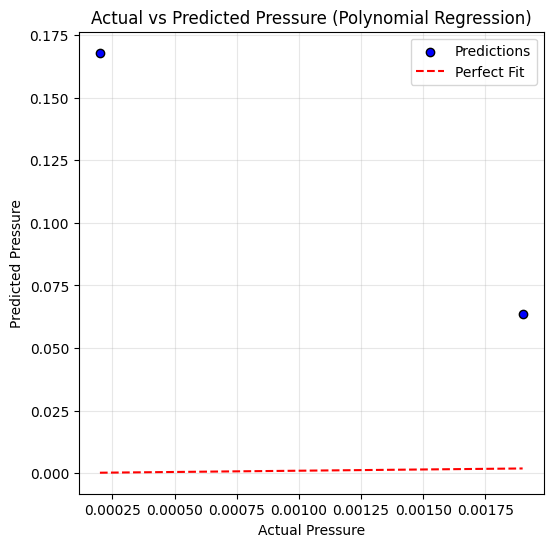

In [16]:
# Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, color="blue", edgecolors="black", label="Predictions")

# Perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Fit"
)

plt.xlabel("Actual Pressure")
plt.ylabel("Predicted Pressure")
plt.title("Actual vs Predicted Pressure (Polynomial Regression)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


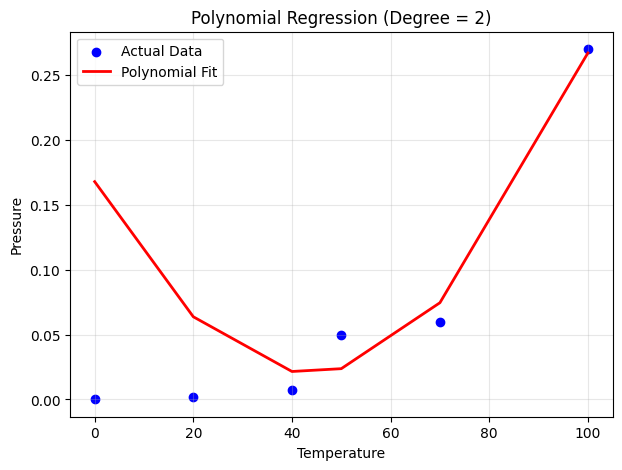

In [17]:
# Regression Curve Plot (Polynomial Fit)
X_sorted = np.sort(X.values, axis=0)
X_sorted_poly = poly.transform(X_sorted)
y_sorted_pred = PR.predict(X_sorted_poly)

plt.figure(figsize=(7, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X_sorted, y_sorted_pred, color="red", linewidth=2, label="Polynomial Fit")

plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title(f"Polynomial Regression (Degree = {degree})")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


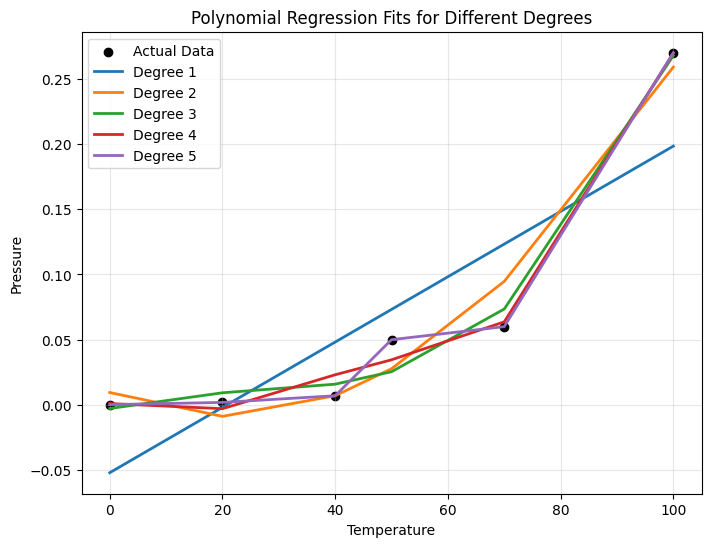

In [21]:
# Visualizing Different Polynomial Degrees
degrees = [1, 2, 3, 4, 5]

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="black", label="Actual Data")

# Sort X for smooth curves
X_sorted = np.sort(X.values, axis=0)

for d in degrees:
    poly_d = PolynomialFeatures(degree=d, include_bias=False)
    X_poly_d = poly_d.fit_transform(X)

    model_d = LinearRegression()
    model_d.fit(X_poly_d, y)

    X_sorted_poly_d = poly_d.transform(X_sorted)
    y_sorted_pred_d = model_d.predict(X_sorted_poly_d)

    plt.plot(
        X_sorted,
        y_sorted_pred_d,
        linewidth=2,
        label=f"Degree {d}"
    )

plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Polynomial Regression Fits for Different Degrees")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [22]:
# Metrics for Different Polynomial Degrees

print("\nPOLYNOMIAL DEGREE COMPARISON")
print("----------------------------")

for d in degrees:
    poly_d = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly_d = poly_d.fit_transform(X_train)
    X_test_poly_d = poly_d.transform(X_test)

    model_d = LinearRegression()
    model_d.fit(X_train_poly_d, y_train)

    y_pred_test_d = model_d.predict(X_test_poly_d)

    mae_d = mean_absolute_error(y_test, y_pred_test_d)
    mse_d = mean_squared_error(y_test, y_pred_test_d)
    rmse_d = np.sqrt(mse_d)
    r2_d = r2_score(y_test, y_pred_test_d)

    print(f"Degree {d} → MAE: {mae_d:.6f}, RMSE: {rmse_d:.6f}, R²: {r2_d:.6f}")



POLYNOMIAL DEGREE COMPARISON
----------------------------
Degree 1 → MAE: 0.135431, RMSE: 0.141551, R²: -27731.630385
Degree 2 → MAE: 0.114783, RMSE: 0.126401, R²: -22112.704344
Degree 3 → MAE: 0.651328, RMSE: 0.747163, R²: -772667.534752
Degree 4 → MAE: 0.218556, RMSE: 0.226639, R²: -71092.690681
Degree 5 → MAE: 0.110084, RMSE: 0.111029, R²: -17061.174437


- The above plot shows polynomial regression curves for degrees 1 to 5.

  - Degree 1 → Linear (underfit)

  - Degree 2–3 → Reasonable fit

  - Degree 4–5 → Overfit tendencies

## Conclusion

Polynomial Linear Regression effectively captures non-linear relationships between the independent and dependent variables.

- Polynomial terms significantly improve model fit
- Higher-degree terms model curvature in data

Thus, polynomial regression is preferred when linear regression fails to represent data trends accurately.
